In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [146]:
manufact = pd.read_csv(path +'사업체_종사자수.csv', encoding='cp949')
sigungu = pd.read_csv(path + 'sigungu_imp_10.csv', encoding='cp949')

In [147]:
sigu = sigungu.loc[:,['년도','시군구','시도','지역','교통사고 발생건수','음주교통사고 발생건수']]
sigu.shape

(226, 6)

## 제조업체 비율이 높은 집단은, 음주사고 발생 비율이 높은 경향성을 보일 것이다.

### 전체 사업체수 분리하기

In [148]:
ex_manufact = manufact.loc[manufact['산업분류별']=='전체',['지역별(시/군/구)','2015']]
ex_manufact.columns = ['시군구','전체산업체수']
ex_manufact.shape #지역별(시/군/구)

(160, 2)

In [149]:
ex_manufact.reset_index(drop=True, inplace=True)

### 제조업수 데이터만들기

In [150]:
manufact = manufact.loc[~(manufact['산업분류별']=='전체'),['지역별(시/군/구)','2015']]
manufact.columns = ['시군구','제조업체수']
manufact.shape

(160, 2)

### 제조업 비율 만들기

In [151]:
manufact.reset_index(drop=True, inplace=True)

In [152]:
manufact['제조업비율'] = (manufact['제조업체수']/ex_manufact['전체산업체수'])

In [156]:
manufact['제조업비율'] = manufact['제조업비율'].apply(lambda x: x *100)

In [157]:
manufact

,시군구,제조업체수,제조업비율
0,경기도,95998,21.473324
1,수원시,2361,6.847249
2,성남시,3247,9.049610
3,의정부시,849,7.155499
4,안양시,2950,12.137420
5,부천시,7863,26.524760
6,광명시,1324,14.308873
7,평택시,2802,16.699446
8,동두천시,289,11.625101
9,안산시,7296,26.821557


In [158]:
df2 = pd.merge(sigu, manufact, left_on='시군구',right_on='시군구')

In [160]:
df2.drop([2,3], axis=0, inplace=True)

In [161]:
df2.shape

(151, 8)

### 음주사고비율 만들기

In [184]:
df2['음주사고비율'] = (df2['음주교통사고 발생건수']/df2['교통사고 발생건수'])

In [187]:
df2['음주사고비율'] = df2['음주사고비율'].apply(lambda x: x *100)

In [188]:
df2

,년도,시군구,시도,지역,교통사고 발생건수,음주교통사고 발생건수,제조업체수,제조업비율,음주사고비율
0,2015,강릉시,강원도,2015_강원도_강릉시,228.30585,53.98342,663,8.115055,23.645220
1,2015,고성군,강원도,2015_강원도_고성군,173.44478,52.52899,104,10.136452,30.285714
4,2015,고성군,경상남도,2015_경상남도_고성군,154.87517,44.70992,321,19.395770,28.868359
5,2015,동해시,강원도,2015_강원도_동해시,191.51456,53.08686,242,7.576706,27.719490
6,2015,삼척시,강원도,2015_강원도_삼척시,169.12354,57.25032,154,6.194690,33.851184
7,2015,속초시,강원도,2015_강원도_속초시,217.14868,62.35443,166,5.176177,28.715086
8,2015,양구군,강원도,2015_강원도_양구군,112.19022,38.51306,64,8.432148,34.328358
9,2015,양양군,강원도,2015_강원도_양양군,210.74816,58.86414,103,9.171861,27.931034
10,2015,영월군,강원도,2015_강원도_영월군,144.31092,35.82892,129,8.722110,24.827588
11,2015,원주시,강원도,2015_강원도_원주시,276.32817,70.51807,1076,8.686526,25.519682


In [211]:
df2['음주교통사고 발생건수'].sum()

7159.827009999999

### 제조업 비율 높은집단, 낮은 집단으로 분리하기

In [189]:
#제조업 비율이 평균보다 높은 집단
a = df2.loc[(df2['제조업비율'])>=15.183,:]
a['group'] = 1
a

C:\Users\COM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,년도,시군구,시도,지역,교통사고 발생건수,음주교통사고 발생건수,제조업체수,제조업비율,음주사고비율,group
4,2015,고성군,경상남도,2015_경상남도_고성군,154.87517,44.70992,321,19.395770,28.868359,1
25,2015,광주시,경기도,2015_경기도_광주시,226.93052,39.78478,5077,35.991777,17.531701,1
27,2015,군포시,경기도,2015_경기도_군포시,134.08089,25.93548,2296,25.579323,19.343159,1
28,2015,김포시,경기도,2015_경기도_김포시,216.00893,43.16652,7010,43.966382,19.983674,1
29,2015,남양주시,경기도,2015_경기도_남양주시,162.87469,31.99970,3945,21.998550,19.646822,1
31,2015,부천시,경기도,2015_경기도_부천시,174.93274,35.99872,7863,26.524760,20.578606,1
34,2015,시흥시,경기도,2015_경기도_시흥시,290.77207,49.05749,9423,42.994023,16.871459,1
35,2015,안산시,경기도,2015_경기도_안산시,246.13068,47.76260,7296,26.821557,19.405383,1
36,2015,안성시,경기도,2015_경기도_안성시,281.14967,54.92149,1923,27.307583,19.534609,1
38,2015,양주시,경기도,2015_경기도_양주시,218.93187,52.95142,3135,35.853156,24.186255,1


In [212]:
a['그룹음주사고비율'] = a['음주교통사고 발생건수'].apply(lambda x: x /7159.82)

C:\Users\COM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
#제조업 비율이 평균보다 낮은 집단
b = df2.loc[~((df2['제조업비율'])>=15.183),:]
b['group'] = 0
b

C:\Users\COM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,년도,시군구,시도,지역,교통사고 발생건수,음주교통사고 발생건수,제조업체수,제조업비율,음주사고비율,group
0,2015,강릉시,강원도,2015_강원도_강릉시,228.30585,53.98342,663,8.115055,23.645220,0
1,2015,고성군,강원도,2015_강원도_고성군,173.44478,52.52899,104,10.136452,30.285714,0
5,2015,동해시,강원도,2015_강원도_동해시,191.51456,53.08686,242,7.576706,27.719490,0
6,2015,삼척시,강원도,2015_강원도_삼척시,169.12354,57.25032,154,6.194690,33.851184,0
7,2015,속초시,강원도,2015_강원도_속초시,217.14868,62.35443,166,5.176177,28.715086,0
8,2015,양구군,강원도,2015_강원도_양구군,112.19022,38.51306,64,8.432148,34.328358,0
9,2015,양양군,강원도,2015_강원도_양양군,210.74816,58.86414,103,9.171861,27.931034,0
10,2015,영월군,강원도,2015_강원도_영월군,144.31092,35.82892,129,8.722110,24.827588,0
11,2015,원주시,강원도,2015_강원도_원주시,276.32817,70.51807,1076,8.686526,25.519682,0
12,2015,인제군,강원도,2015_강원도_인제군,184.14165,36.95150,87,7.823741,20.066889,0


In [217]:
len(a)/(len(a)+len(b)),len(b)/(len(a)+len(b))

(0.31788079470198677, 0.6821192052980133)

In [219]:
b.head(1)

,년도,시군구,시도,지역,교통사고 발생건수,음주교통사고 발생건수,제조업체수,제조업비율,음주사고비율,group,그룹음주사고비율
0,2015,강릉시,강원도,2015_강원도_강릉시,228.30585,53.98342,663,8.115055,23.64522,0,0.00754


In [213]:
b['그룹음주사고비율'] = b['음주교통사고 발생건수'].apply(lambda x: x /7159.82)

C:\Users\COM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [215]:
b['그룹음주사고비율'].mean()

0.006473777083889916

In [216]:
a['그룹음주사고비율'].mean()

0.006941707071546493

In [197]:
full = pd.concat([a,b], axis=0)
full.shape
full

,년도,시군구,시도,지역,교통사고 발생건수,음주교통사고 발생건수,제조업체수,제조업비율,음주사고비율,group
4,2015,고성군,경상남도,2015_경상남도_고성군,154.87517,44.70992,321,19.395770,28.868359,1
25,2015,광주시,경기도,2015_경기도_광주시,226.93052,39.78478,5077,35.991777,17.531701,1
27,2015,군포시,경기도,2015_경기도_군포시,134.08089,25.93548,2296,25.579323,19.343159,1
28,2015,김포시,경기도,2015_경기도_김포시,216.00893,43.16652,7010,43.966382,19.983674,1
29,2015,남양주시,경기도,2015_경기도_남양주시,162.87469,31.99970,3945,21.998550,19.646822,1
31,2015,부천시,경기도,2015_경기도_부천시,174.93274,35.99872,7863,26.524760,20.578606,1
34,2015,시흥시,경기도,2015_경기도_시흥시,290.77207,49.05749,9423,42.994023,16.871459,1
35,2015,안산시,경기도,2015_경기도_안산시,246.13068,47.76260,7296,26.821557,19.405383,1
36,2015,안성시,경기도,2015_경기도_안성시,281.14967,54.92149,1923,27.307583,19.534609,1
38,2015,양주시,경기도,2015_경기도_양주시,218.93187,52.95142,3135,35.853156,24.186255,1


In [205]:
full.loc[full['group'] == 0]['음주사고비율']

0      23.645220
1      30.285714
5      27.719490
6      33.851184
7      28.715086
8      34.328358
9      27.931034
10     24.827588
11     25.519682
12     20.066889
13     18.825301
14     27.951392
15     24.852856
16     29.857142
17     16.714082
18     25.073964
19     24.610591
20     18.650792
21     17.901233
22     20.401179
23     13.742876
24     18.476116
26     15.505766
30     27.369038
32     18.243487
33     21.143264
37     18.176838
39     16.804408
40     28.082189
41     17.333037
42     15.834587
44     19.709144
45     17.794387
51     26.410882
52     32.309750
54     41.681899
57     41.842103
60     17.062312
63     30.827386
64     29.310346
66     38.784071
67     35.902632
73     26.808144
74     33.894032
75     43.431636
76     28.461959
78     29.445757
79     29.947232
80     47.904191
81     33.458446
83     31.922400
84     50.000000
85     33.965249
86     38.753798
88     40.281689
90     25.786608
91     42.576028
92     40.729486
93     33.6448

### T검증 하는 과정

In [208]:
# 연속형 변수 중에 DI1_pr에 따라 평균이 다른 변수만 추출
import matplotlib.pyplot as plt
import seaborn as sns # plt, sns는 그림을 그리기 위함
import scipy.stats as stats # t-test를 하기 위함

def con_check(var1, var2, data): # var1에는 질병에 관한 변수, var2는 연속형 변수들, data는 확인할 dataframe
    var1_0 = data.loc[data[var1] == 0][var2] # var1==0인 경우의 var2값
    var1_1 = data.loc[data[var1] == 1][var2] # var1==1인 경우의 var2값
    g = sns.distplot(var1_0, label = '제조업비율 높음')
    g = sns.distplot(var1_1, label = '제조업비율 낮음') #각 경우의 분포 그래프 그리기
    g.legend()
    plt.show()
    
    
    # t-test하기 전에 먼저 두 집단의 var2변수가 등분산을 충족하는지 검정
    # H0(귀무가설) : 두 모집단의 분산은 같다
    # H1(대립가설) : 두 모집단의 분산은 다르다
    equal_variance=stats.levene(var1_0, var1_1)
    print('등분산 검정에 대한 p-value : %s'%equal_variance[1]) # 등분산 검정에 대한 p-value
    
    
    # 독립표본 T검정
    #H0(귀무가설) : var1에 따른 var2의 평균에 차이가 없다
    #H1(대립가설) : var1에 따른 var2의 평균에 차이가 있다
     
    
    # 등분산 검정에 대한 p-value가 0.05보다 작은 경우, H0를 기각하므로 두 모집단의 분산은 다른다
    if equal_variance[1] < 0.05:
        print('등분산 검정에 대한 p-value가 0.05보다 작다')
        # 두 모집단의 분산이 다른 경우, equal_var=False로 놓고 독립표본 t-검정 진행
        t = stats.ttest_ind(var1_0, var1_1, equal_var=False)
        print('t-test에 대한 p-vlaue : %s'%t[1])
        if t[1] < 0.05:
            print('T-test에 대한 p-value가 0.05보다 작으므로 HO를 기각한다★')
            return var2
        else:
            print('T-test에 대한 p-value가 0.05보다 크므로 HO를 채택')
            
    # 등분산 검정에 대한 p-value가 0.05보다 큰 경우, H0를 채택하므로 두 모집단의 분산은 같다.
    else: 
        # 두 모집단의 분산이 같은 경우, equal_var=True로 놓고 독립표본 t-검정 진행
        t = stats.ttest_ind(var1_0, var1_1, equal_var=True)
        print('t-test에 대한 p-vlaue : %s'%t[1])
        
        if t[1] < 0.05:
            print('T-test에 대한 p-value가 0.05보다 작으므로 HO를 기각한다★')
            return var2
        else:
            print('T-test에 대한 p-value가 0.05보다 크므로 HO를 채택')
            

C:\Users\COM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


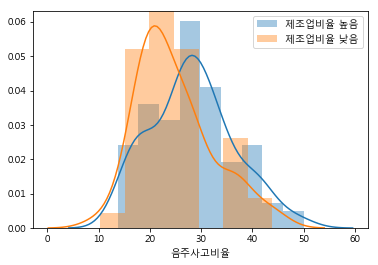

등분산 검정에 대한 p-value : 0.478876245169249
t-test에 대한 p-vlaue : 0.013773430226540614
T-test에 대한 p-value가 0.05보다 작으므로 HO를 기각한다★


'음주사고비율'

In [209]:
con_check('group','음주사고비율',full)